# Import all require module

In [1]:
#import all require module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import csv file in dataframe
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.drop(["id"],axis=1,inplace=True)

In [6]:
#set id in df
df.insert(0, 'ID', range(1, 1 + len(df)))
df.set_index("ID",inplace=True)

In [7]:
#measure the nan(null) values in df
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
#percentage of nan(null) values in df
nullper=(df.isnull().sum()/len(df))*100
print(nullper)

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


In [9]:
# missing value treatment in bmi
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [10]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
ID,,,,,,,,,,,
1,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
2,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
3,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
4,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
5,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5106,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5107,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5108,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0


In [11]:
# we need diff analysis to make analysis process faster during EDA process we will seperate 
# our entier dataframe into two part 1) df_num 2) df_cat 
# df_num = int,float 
# df_cat = object

In [12]:
df_num=df.select_dtypes(['int64','float64'])

In [13]:
df_num.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [14]:
df_cat=df.select_dtypes(['object'])

In [15]:
df_cat.columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

# Outlier Analysis on numeric values

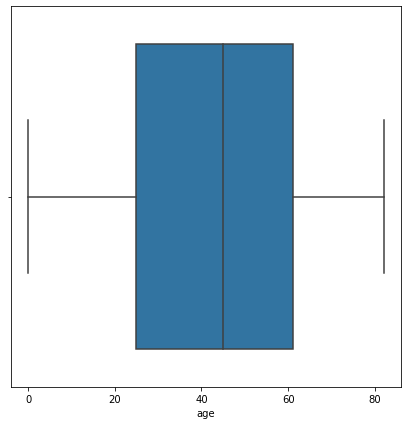

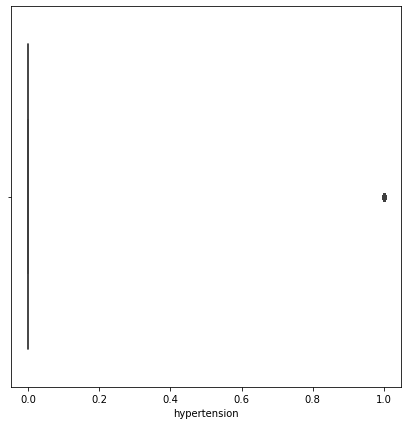

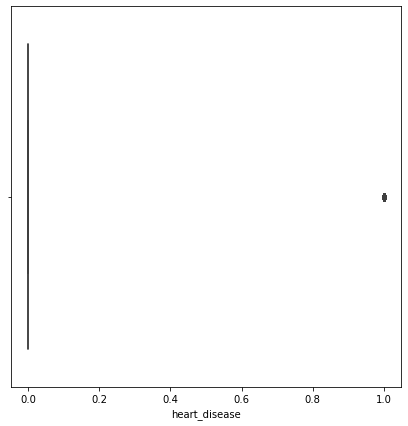

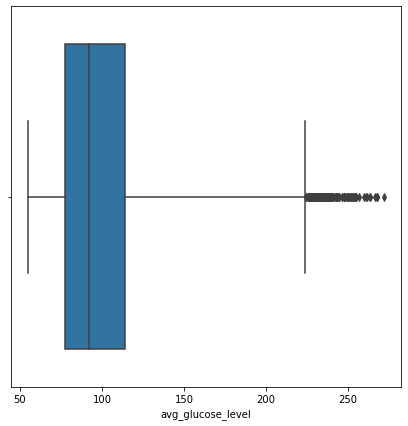

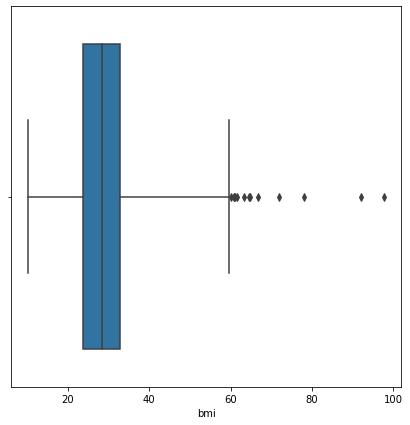

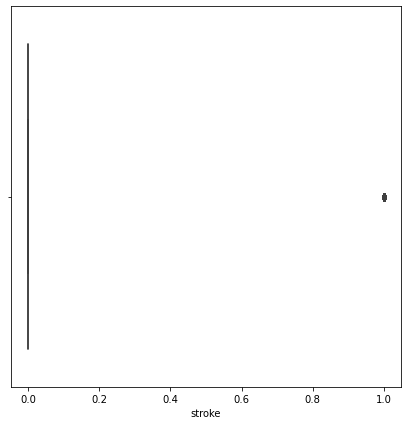

In [16]:
for i in df_num:
    plt.figure(figsize=(7,7))
    sns.boxplot(data=df_num,x=i,whis=3)
    # upper whisker = q3+1.5*IQR
    # lower whisker = q1 - 1.5*IQR 
    # boxplot will calculate upper whisker and lower whisker by it's own and the nit will plot the box
    plt.show()

# Outlier Treatments

In [17]:
df_num.shape

(5110, 6)

In [18]:
# avg_glucose_level Column Outlier Treatment 
q1=np.quantile(df_num["avg_glucose_level"],0.25)
q3=np.quantile(df_num["avg_glucose_level"],0.75)
iqr=q3-q1
print("Quantile1 for avg_glucose_level is => ",q1)
print("Quantile3 for avg_glucose_level is => ",q3)
print("IQR for avg_glucose_level column is => ",iqr)
#as we know we have higher extream values so no need to calculate lower whisker will only go for upper whisker 
up_whs=q3+3*iqr
print("upper whisker with 3 penalty is => ",up_whs)
# accept all those records which come below given whisker values
df_num=df_num[df_num["avg_glucose_level"]<up_whs]
df_num.shape

Quantile1 for avg_glucose_level is =>  77.24499999999999
Quantile3 for avg_glucose_level is =>  114.09
IQR for avg_glucose_level column is =>  36.84500000000001
upper whisker with 3 penalty is =>  224.62500000000006


(4944, 6)

In [19]:
# bmi Column Outlier Treatment 
q1=np.quantile(df_num["bmi"],0.25)
q3=np.quantile(df_num["bmi"],0.75)
iqr=q3-q1
print("Quantile1 for bmi is => ",q1)
print("Quantile3 for bmi is => ",q3)
print("IQR for bmi column is => ",iqr)
#as we know we have higher extream values so no need to calculate lower whisker will only go for upper whisker 
up_whs=q3+3*iqr
print("upper whisker with 3 penalty is => ",up_whs)
# accept all those records which come below given whisker values
df_num=df_num[df_num["bmi"]<up_whs]
df_num.shape

Quantile1 for bmi is =>  23.6
Quantile3 for bmi is =>  32.6
IQR for bmi column is =>  9.0
upper whisker with 3 penalty is =>  59.6


(4930, 6)

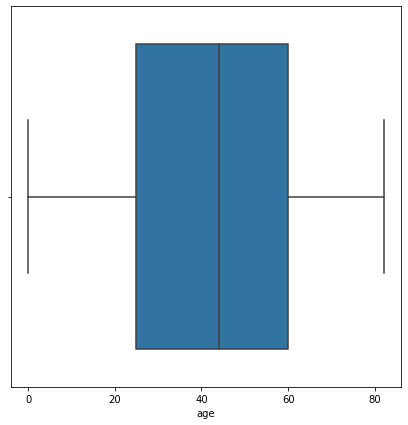

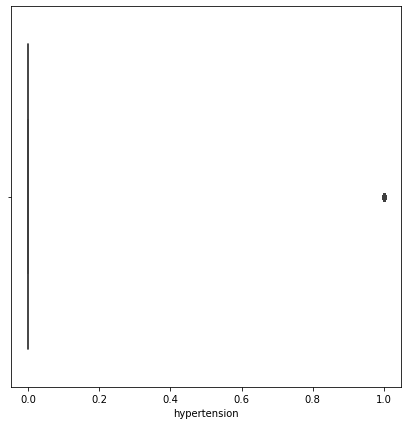

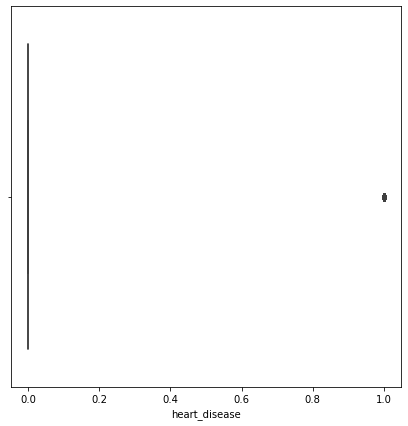

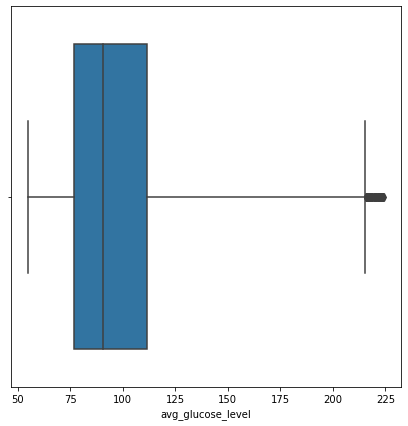

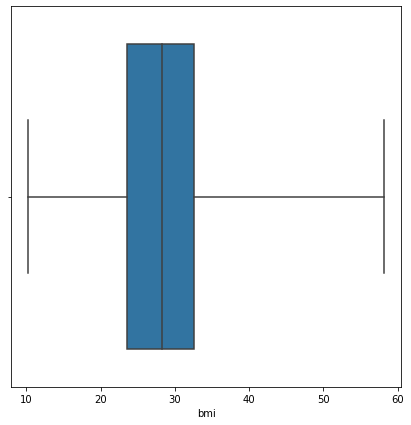

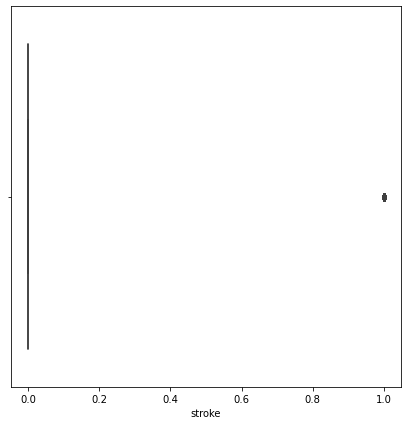

In [20]:
for i in df_num:
    plt.figure(figsize=(7,7))
    sns.boxplot(data=df_num,x=i,whis=3)
    # upper whisker = q3+1.5*IQR
    # lower whisker = q1 - 1.5*IQR 
    # boxplot will calculate upper whisker and lower whisker by it's own and the nit will plot the box
    plt.show()

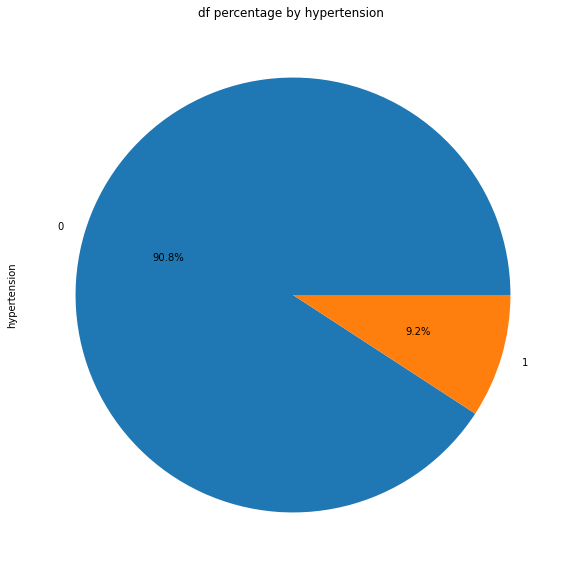

In [21]:
# graphical analysis on categorical column Method data share percentage 
# using pie plot 
plt.figure(figsize=(10,10))
df_num['hypertension'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("df percentage by hypertension ")
plt.show()
#hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

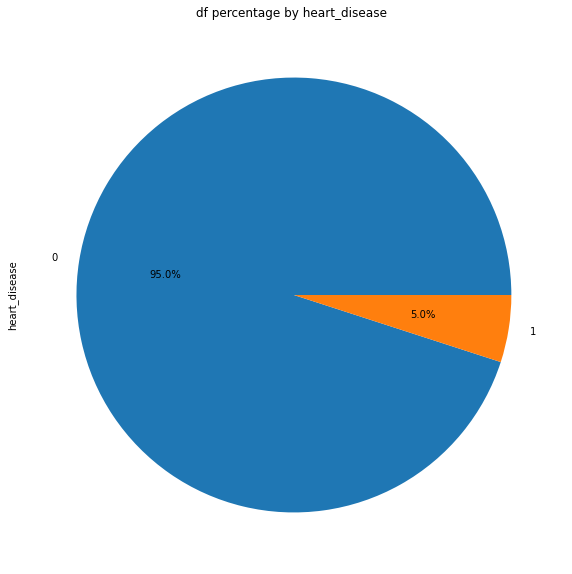

In [22]:
# graphical analysis on categorical column Method data share percentage 
# using pie plot 
plt.figure(figsize=(10,10))
df_num['heart_disease'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("df percentage by heart_disease ")
plt.show()
#0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

# categorical data analysis

In [23]:
df_cat

,gender,ever_married,work_type,Residence_type,smoking_status
ID,,,,,
1,Male,Yes,Private,Urban,formerly smoked
2,Female,Yes,Self-employed,Rural,never smoked
3,Male,Yes,Private,Rural,never smoked
4,Female,Yes,Private,Urban,smokes
5,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5106,Female,Yes,Private,Urban,never smoked
5107,Female,Yes,Self-employed,Urban,never smoked
5108,Female,Yes,Self-employed,Rural,never smoked


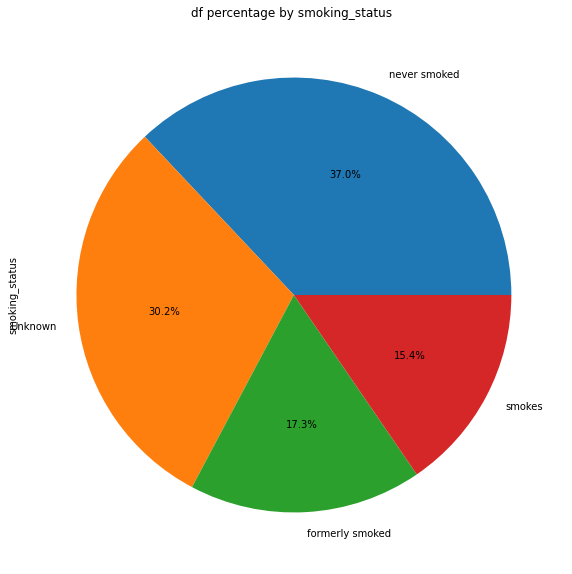

In [24]:
# graphical analysis on categorical column Method data share percentage 
# using pie plot 
plt.figure(figsize=(10,10))
df_cat['smoking_status'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("df percentage by smoking_status ")
plt.show()

# Label Encoding categorical data

In [25]:
from sklearn.preprocessing import LabelEncoder 

In [26]:
le=LabelEncoder()
for col in df_cat:
    df_cat[col]=le.fit_transform(df_cat[col])

In [27]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 1 to 5110
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   gender          5110 non-null   int32
 1   ever_married    5110 non-null   int32
 2   work_type       5110 non-null   int32
 3   Residence_type  5110 non-null   int32
 4   smoking_status  5110 non-null   int32
dtypes: int32(5)
memory usage: 139.7 KB


In [28]:
#merge the df_cat and df_num to all together
df_new=pd.merge(df_num,df_cat,on="ID")

In [29]:
df_new

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
ID,,,,,,,,,,,
2,61.0,0,0,202.21,28.893237,1,0,1,3,0,2
3,80.0,0,1,105.92,32.500000,1,1,1,2,0,2
4,49.0,0,0,171.23,34.400000,1,0,1,2,1,3
5,79.0,1,0,174.12,24.000000,1,0,1,3,0,2
6,81.0,0,0,186.21,29.000000,1,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5106,80.0,1,0,83.75,28.893237,0,0,1,2,1,2
5107,81.0,0,0,125.20,40.000000,0,0,1,3,1,2
5108,35.0,0,0,82.99,30.600000,0,0,1,3,0,2


In [30]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 2 to 5110
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4930 non-null   float64
 1   hypertension       4930 non-null   int64  
 2   heart_disease      4930 non-null   int64  
 3   avg_glucose_level  4930 non-null   float64
 4   bmi                4930 non-null   float64
 5   stroke             4930 non-null   int64  
 6   gender             4930 non-null   int32  
 7   ever_married       4930 non-null   int32  
 8   work_type          4930 non-null   int32  
 9   Residence_type     4930 non-null   int32  
 10  smoking_status     4930 non-null   int32  
dtypes: float64(3), int32(5), int64(3)
memory usage: 365.9 KB


In [31]:
x=df_new.drop("stroke",axis=1)
y=df_new["stroke"]

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

# Random forest 

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [34]:
rf=RandomForestClassifier(n_estimators=10,            #n_estimators, The number of trees in the forest.
                          max_features=5,             #The number of features to consider when looking for the best split:
                          random_state=1)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1407
           1       0.33      0.03      0.05        72

    accuracy                           0.95      1479
   macro avg       0.64      0.51      0.51      1479
weighted avg       0.92      0.95      0.93      1479



# boosting techniques

# adaboost

In [35]:
# algorithm based ensemple ML 
from sklearn.ensemble import AdaBoostClassifier

In [36]:
from sklearn.metrics import classification_report

In [37]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1407
           1       0.25      0.03      0.05        72

    accuracy                           0.95      1479
   macro avg       0.60      0.51      0.51      1479
weighted avg       0.92      0.95      0.93      1479



# DL

In [38]:
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

In [39]:
x=df_new.drop("stroke",axis=1)
y=df_new["stroke"]

In [40]:
ss=StandardScaler()
x = ss.fit_transform(x)

In [41]:
x.shape[1]

10

In [42]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [43]:
model = tf.keras.Sequential([tf.keras.layers.Dense(2, activation="relu",input_shape=(x.shape[1],)),
                            tf.keras.layers.Dense(3, activation="relu"),
                            tf.keras.layers.Dense(1, activation="sigmoid")]
                           )

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 22        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(optimizer="sgd", loss="binary_crossentropy")

In [46]:
trained_model = model.fit(x_train, y_train, epochs=50, batch_size=50)

Epoch 1/50
70/70 [==============================] - 0s 470us/step - loss: 0.6472
Epoch 2/50
70/70 [==============================] - 0s 467us/step - loss: 0.4493
Epoch 3/50
70/70 [==============================] - 0s 457us/step - loss: 0.3708
Epoch 4/50
70/70 [==============================] - 0s 548us/step - loss: 0.3128
Epoch 5/50
70/70 [==============================] - 0s 572us/step - loss: 0.2969
Epoch 6/50
70/70 [==============================] - 0s 508us/step - loss: 0.2704
Epoch 7/50
70/70 [==============================] - 0s 494us/step - loss: 0.2446
Epoch 8/50
70/70 [==============================] - 0s 592us/step - loss: 0.2438
Epoch 9/50
70/70 [==============================] - 0s 516us/step - loss: 0.2323
Epoch 10/50
70/70 [==============================] - 0s 546us/step - loss: 0.2366
Epoch 11/50
70/70 [==============================] - 0s 517us/step - loss: 0.2259
Epoch 12/50
70/70 [==============================] - 0s 517us/step - loss: 0.2076
Epoch 13/50
70/70 [======

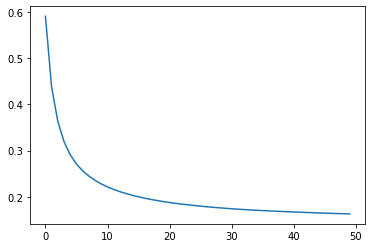

In [47]:
plt.plot(trained_model.history['loss'])
plt.show()

In [48]:
y_hat = model.predict(x_test)

In [49]:
y_hat

array([[0.05259633],
       [0.02777457],
       [0.02393654],
       ...,
       [0.02389592],
       [0.02393654],
       [0.0259046 ]], dtype=float32)

In [50]:
y_hat1 = np.where(y_hat >= 0.5, 1, 0) #where value is o.5 than greater then shows 1 else 0

In [51]:
y_hat1.flatten()

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_test, y_hat1))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1409
           1       0.00      0.00      0.00        70

    accuracy                           0.95      1479
   macro avg       0.48      0.50      0.49      1479
weighted avg       0.91      0.95      0.93      1479

